## 지하철 노선별 출근길 혼잡도 

In [146]:
# import the Seaborn package for good data visualization.

%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [147]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 폰트 경로 설정
font_path = './NanumGothic.ttf'

# 폰트 등록
font_manager.fontManager.addfont(font_path)

# 폰트 설정
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

import pandas as pd

In [148]:
# append the song data from nigerian-songs.csv.
# Load up a dataframe with some data about the songs. 

# df = pd.read_csv("./도로교통공단_시군구별 월별 교통사고 통계_20221231.csv")
df = pd.read_csv("./한국환경공단_도로 재비산먼지 측정 정보_20240331.csv")
# df = pd.read_csv("서울교통공사_지하철혼잡도정보_20230331.csv")
# df = pd.read_csv("한국수자원공사_지하수이용정보_지역별_20231231.csv")
df.head()

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,2024-03-04,10:47,서울,성동구,고산자로,서울특별시 성동구 마장동 610-10천,서울특별시 성동구 성수동1가 701-1천,6,33,25,매우좋음
1,2024-03-04,11:42,서울,구로구,구로중앙로,서울특별시 양천구 신정동 330-8제,서울특별시 구로구 구로동 147-5 도,8,26,56,좋음
2,2024-03-04,12:02,서울,구로구,경인로,서울특별시 구로구 신도림동 330-7도,서울특별시 구로구 온수동 44-23 도,9,25,34,매우좋음
3,2024-03-04,12:35,서울,구로구,서해안로,서울특별시 구로구 개봉동 237-12 철,서울특별시 구로구 항동 산50-10 도,9,24,52,좋음
4,2024-03-04,12:54,경기,부천시,양지로,경기도 부천시 옥길동 739-4 도,경기도 부천시 괴안동 50 도,9,25,106,보통


## 데이터 전처리

In [149]:

df.info() # 데이터프레임의 구조 확인.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   측정일자        588 non-null    object
 1   측정시간        588 non-null    object
 2   지역          588 non-null    object
 3   지역명         588 non-null    object
 4   도로명         588 non-null    object
 5   시작점         588 non-null    object
 6   종점          588 non-null    object
 7   기온          588 non-null    int64 
 8   습도          588 non-null    int64 
 9   재비산먼지 평균농도  588 non-null    int64 
 10  오염범례        588 non-null    object
dtypes: int64(3), object(8)
memory usage: 50.7+ KB


In [150]:
# 9시 이후의 데이터 삭제
df = df[["측정일자","측정시간","지역명","지역", "기온","습도","재비산먼지 평균농도"]]
df.head()

,측정일자,측정시간,지역명,지역,기온,습도,재비산먼지 평균농도
0,2024-03-04,10:47,성동구,서울,6,33,25
1,2024-03-04,11:42,구로구,서울,8,26,56
2,2024-03-04,12:02,구로구,서울,9,25,34
3,2024-03-04,12:35,구로구,서울,9,24,52
4,2024-03-04,12:54,부천시,경기,9,25,106


In [151]:
df.isnull().sum()


측정일자          0
측정시간          0
지역명           0
지역            0
기온            0
습도            0
재비산먼지 평균농도    0
dtype: int64

Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value



In [152]:
df.describe()


,기온,습도,재비산먼지 평균농도
count,588.000000,588.00000,588.000000
mean,9.103741,55.22619,59.636054
std,2.521685,19.60604,83.207425
min,3.000000,16.00000,1.000000
25%,7.000000,39.00000,15.000000
50%,9.000000,54.00000,34.000000
75%,11.000000,70.00000,69.000000
max,17.000000,100.00000,1063.000000


Text(0.5, 1.0, 'Top genres')

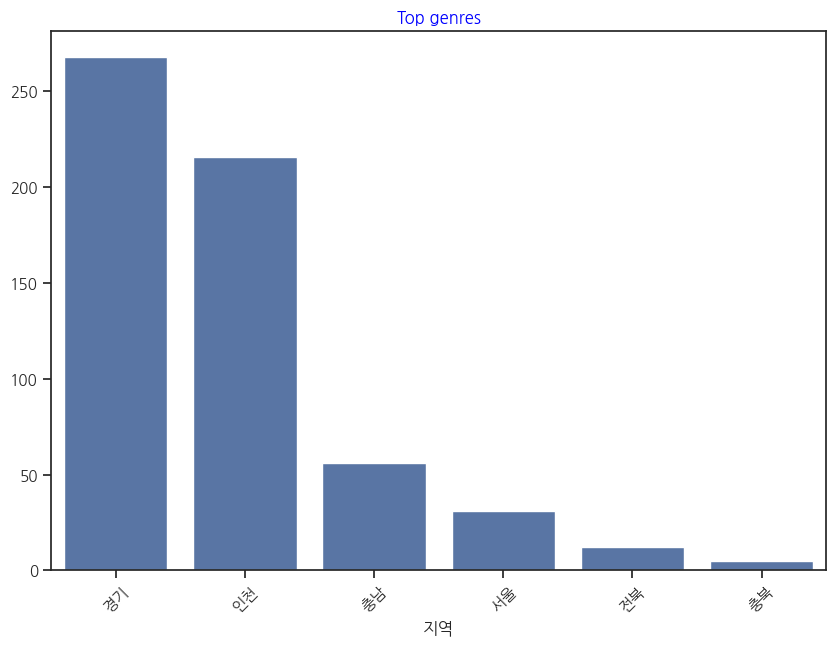

In [153]:
# use a barplot to find out the most popular genres

import seaborn as sns

# top = df['시도'].value_counts()
top = df['지역'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:20].index,y=top[:20].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')


Text(0.5, 1.0, 'Top genres')

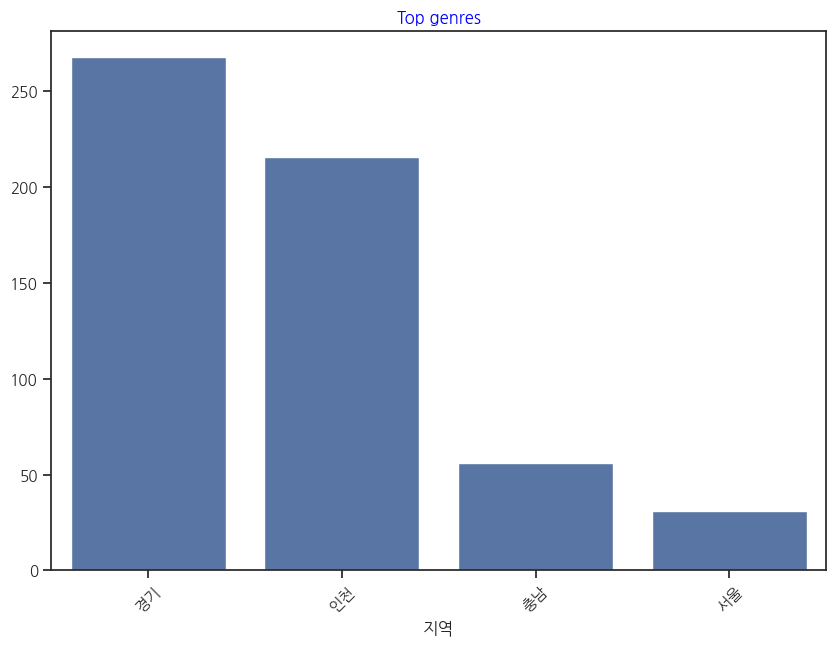

In [154]:
df = df[(df['지역'] == '경기') | (df['지역'] == '인천') | (df['지역'] == '충남') | (df['지역'] == '서울')]
df = df[(df['재비산먼지 평균농도'] > 0)]
top = df['지역'].value_counts()

# df = df[(df['지역'] == '서울') | (df['지역'] == '경기') | (df['지역'] == '경북')]
# df = df[(df['재비산먼지 평균농도'] > 0)]
# top = df['지역'].value_counts()

# df = df[(df['지역'] == '서울') | (df['지역'] == '경기') | (df['지역'] == '경북')]
# df = df[(df['재비산먼지 평균농도'] > 0)]
# top = df['지역'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current fon

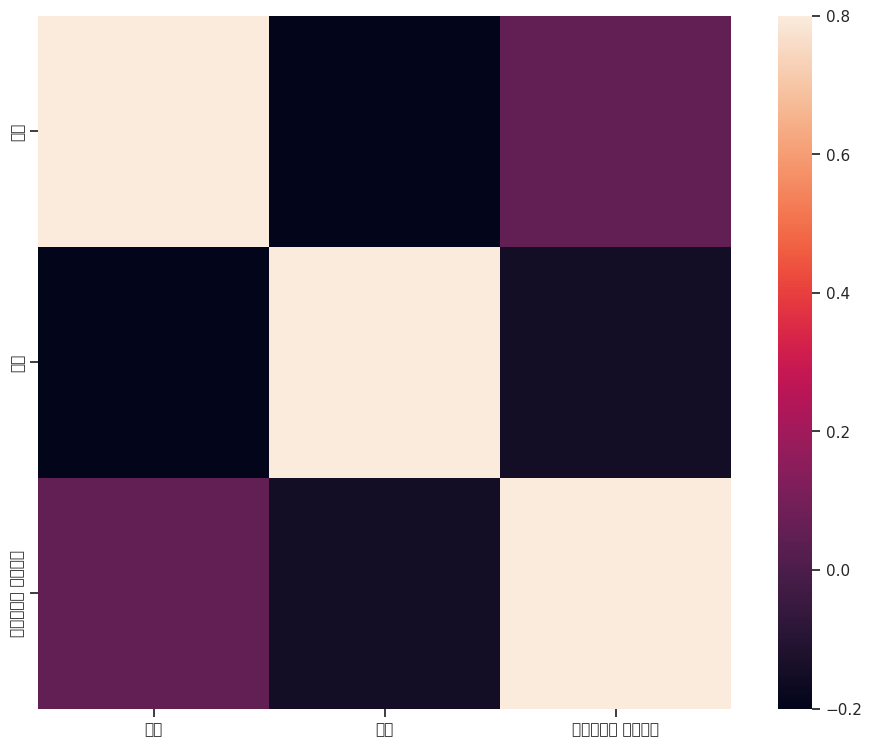

In [161]:
# do a quick test to see if the data correlates in any particularly strong way

df_modified = df.iloc[:, 4:]
corrmat = df_modified.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

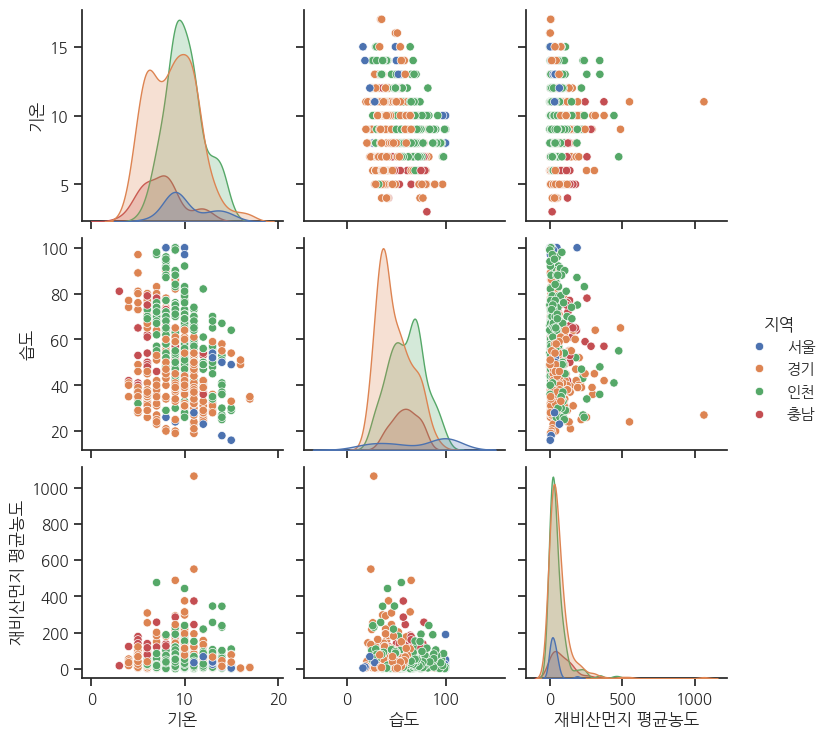

In [156]:
# pairplot 그리기
sns.pairplot(df, hue='지역', diag_kind='kde', kind='scatter')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYE

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyp

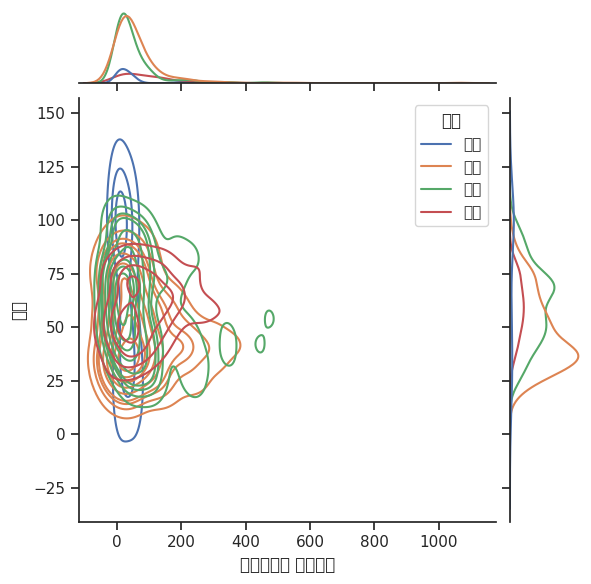

In [157]:

# examine our top three genres data distribution for popularity and danceability along a given x and y axis

import seaborn as sns

sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data = df,
    x="재비산먼지 평균농도", y="습도", hue="지역",
    kind="kde",
)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyp

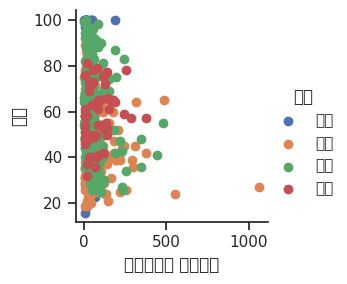

In [158]:
sns.FacetGrid(df, hue="지역") \
   .map(plt.scatter, "재비산먼지 평균농도", "습도") \
   .add_legend()

# outlier 확인

<Axes: xlabel='습도'>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyp

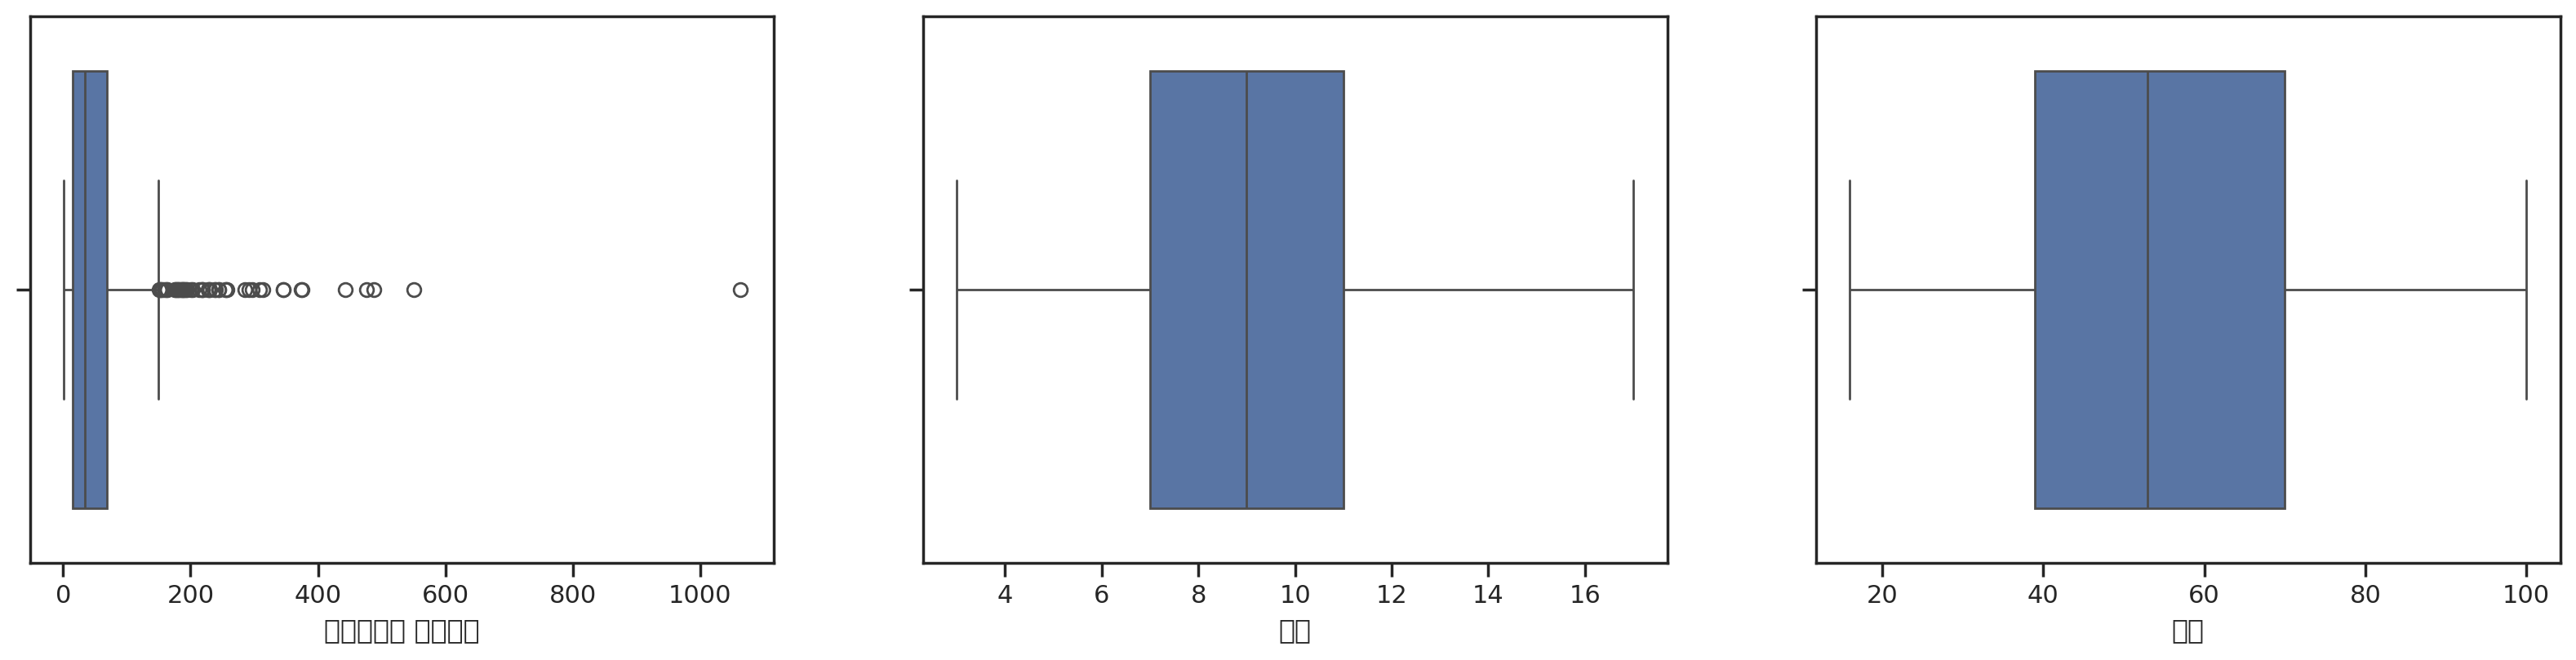

In [162]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = '재비산먼지 평균농도', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = '기온', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = '습도', data = df)

In [163]:
# choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:
# 시도,시군구,생활용_개소수,생활용_이용량,공업용_개소수,공업용_이용량,농업용_개소수,농업용_이용량,기타용_개소수,기타용_이용량

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('지역','재비산먼지 평균농도','기온','습도')]

y = df['지역']

X['지역'] = le.fit_transform(X['지역'])

# X = scaler.fit_transform(X)

y = le.transform(y)

In [164]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [165]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.7138987779969403

In [166]:
# range: These are the iterations of the clustering process
# random_state: "Determines random number generation for centroid initialization."
# WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid. Source.
# Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are." Source. The value is appended to the wcss variable on each iteration.
# k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

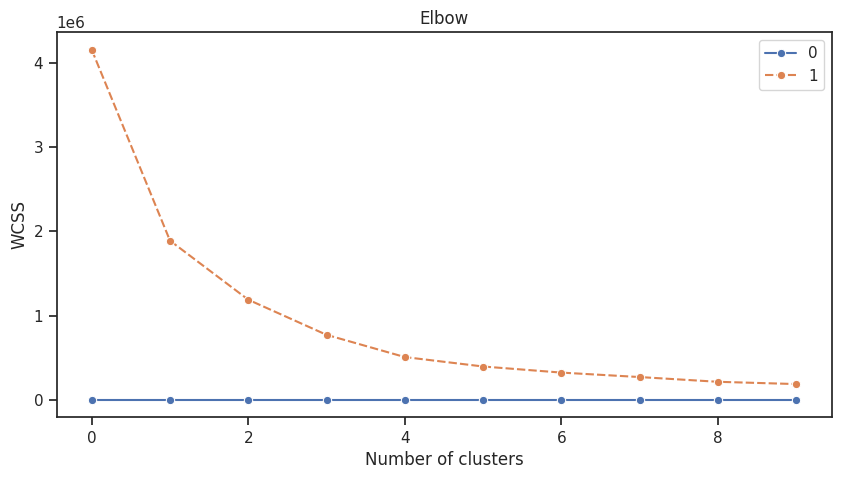

In [167]:
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figu

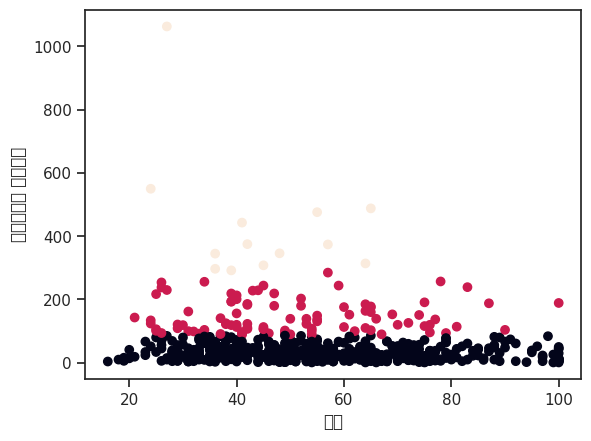

In [196]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['습도'],df['재비산먼지 평균농도'],c = labels)
plt.xlabel('습도')
plt.ylabel('재비산먼지 평균농도')
plt.show()

In [197]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 220 out of 571 samples were correctly labeled.
Accuracy score: 0.39
